In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
file_path = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
years = df['Year of Year']
index_points = df['Index Point']
prices = df['Price']

# Calculate annual growth rates
price_growth = prices.pct_change().dropna() * 100
index_growth = index_points.pct_change().dropna() * 100

avg_price_growth = price_growth.mean()
avg_index_growth = index_growth.mean()

# Identify years with negative price growth
negative_growth_years = years[price_growth.index][price_growth < 0].tolist()

# Create separate line plots for Index Point and Price
fig_index = go.Figure()
fig_index.add_trace(go.Scatter(x=years, y=index_points, mode='lines+markers', name='Index Point'))
fig_index.update_layout(
    title='Kuala Lumpur High-rise Property Index Trend (2010–2024)',
    xaxis_title='Year',
    yaxis_title='Index Point'
)

fig_price = go.Figure()
fig_price.add_trace(go.Scatter(x=years, y=prices, mode='lines+markers', name='Price'))
fig_price.update_layout(
    title='Kuala Lumpur High-rise Property Price Trend (2010–2024)',
    xaxis_title='Year',
    yaxis_title='Price'
)

# Display plots
fig_index.show()
fig_price.show()

# Save plot as JSON (no image export)
fig_index.write_json("kl_property_index_trends.json")
fig_price.write_json("kl_property_price_trends.json")


# Print summary
print(f"Average annual growth rate in Price: {avg_price_growth:.2f}%")
print(f"Average annual growth rate in Index Point: {avg_index_growth:.2f}%")
print("Years with negative price growth:", negative_growth_years)

Average annual growth rate in Price: 6.43%
Average annual growth rate in Index Point: 6.38%
Years with negative price growth: [2018, 2019]


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv")

# Extract relevant columns
years = df['Year of Year']
index_points = df['Index Point']
prices = df['Price']

# Calculate annual growth rates
price_growth = prices.pct_change().dropna() * 100
index_growth = index_points.pct_change().dropna() * 100

avg_price_growth = price_growth.mean()
avg_index_growth = index_growth.mean()

# Identify years with negative price growth using NumPy for alignment
growth_years = years.iloc[1:].to_numpy()
price_growth_np = price_growth.to_numpy()
negative_growth_years = growth_years[price_growth_np < 0].tolist()

# Create separate line plots for Index Point and Price
fig_index = go.Figure()
fig_index.add_trace(go.Scatter(x=years, y=index_points, mode='lines+markers', name='Index Point'))
fig_index.update_layout(
    title='Kuala Lumpur High-rise Property Index Trend (2010–2024)',
    xaxis_title='Year',
    yaxis_title='Index Point'
)
fig_index.write_json("kl_property_index_trends.json")

fig_price = go.Figure()
fig_price.add_trace(go.Scatter(x=years, y=prices, mode='lines+markers', name='Price'))
fig_price.update_layout(
    title='Kuala Lumpur High-rise Property Price Trend (2010–2024)',
    xaxis_title='Year',
    yaxis_title='Price'
)

# Add annotations for negative growth years
for year in negative_growth_years:
    price_value = prices[years == year].values[0]
    fig_price.add_annotation(x=year, y=price_value,
                             text="Negative Growth", showarrow=True, arrowhead=2)
fig_price.write_json("kl_property_price_trends.json")

# Create dual-axis chart
fig_dual = make_subplots(specs=[[{"secondary_y": True}]])
fig_dual.add_trace(go.Scatter(x=years, y=index_points, name="Index Point"), secondary_y=False)
fig_dual.add_trace(go.Scatter(x=years, y=prices, name="Price"), secondary_y=True)
fig_dual.update_layout(
    title="KL High-rise Property Trends (2010–2024)",
    xaxis_title="Year",
    yaxis_title="Index Point",
    yaxis2_title="Price"
)
fig_dual.write_json("kl_property_dual_axis_trends.json")

# Create normalized comparison chart
norm_index = (index_points / index_points.iloc[0]) * 100
norm_price = (prices / prices.iloc[0]) * 100
fig_norm = go.Figure()
fig_norm.add_trace(go.Scatter(x=years, y=norm_index, mode='lines+markers', name='Normalized Index'))
fig_norm.add_trace(go.Scatter(x=years, y=norm_price, mode='lines+markers', name='Normalized Price'))
fig_norm.update_layout(
    title='Normalized KL High-rise Property Trends (2010 = 100)',
    xaxis_title='Year',
    yaxis_title='Normalized Value'
)
fig_norm.write_json("kl_property_normalized_trends.json")

# Print summary
print(f"Average annual growth rate in Price: {avg_price_growth:.2f}%")
print(f"Average annual growth rate in Index Point: {avg_index_growth:.2f}%")
print("Years with negative price growth:", negative_growth_years)

Average annual growth rate in Price: 6.43%
Average annual growth rate in Index Point: 6.38%
Years with negative price growth: [2018, 2019]


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset
file_path = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
years = df['Year of Year']
index_points = df['Index Point']
prices = df['Price']

# Calculate annual growth rates
price_growth = prices.pct_change().dropna() * 100
index_growth = index_points.pct_change().dropna() * 100

avg_price_growth = price_growth.mean()
avg_index_growth = index_growth.mean()

# Identify years with negative price growth
growth_years = years.iloc[1:].to_numpy()
negative_growth_years = growth_years[price_growth.to_numpy() < 0]

# --- Plot 1: Index Trend ---
fig_index = go.Figure()
fig_index.add_trace(go.Scatter(x=years, y=index_points, mode='lines+markers', name='Index Point'))
fig_index.update_layout(
    title='Kuala Lumpur High-rise Property Index Trend (2010–2024)',
    xaxis_title='Year',
    yaxis_title='Index Point'
)
fig_index.show()

# --- Plot 2: Price Trend with Annotations ---
fig_price = go.Figure()
fig_price.add_trace(go.Scatter(x=years, y=prices, mode='lines+markers', name='Price'))
for year in negative_growth_years:
    fig_price.add_annotation(x=year, y=prices[years == year].values[0],
                             text="Negative Growth", showarrow=True, arrowhead=2)
fig_price.update_layout(
    title='Kuala Lumpur High-rise Property Price Trend (2010–2024)',
    xaxis_title='Year',
    yaxis_title='Price'
)
fig_price.show()

# --- Plot 3: Dual-Axis Chart ---
fig_dual = make_subplots(specs=[[{"secondary_y": True}]])
fig_dual.add_trace(go.Scatter(x=years, y=index_points, name="Index Point"), secondary_y=False)
fig_dual.add_trace(go.Scatter(x=years, y=prices, name="Price"), secondary_y=True)
fig_dual.update_layout(title="KL High-rise Property Trends (2010–2024)")
fig_dual.update_xaxes(title_text="Year")
fig_dual.update_yaxes(title_text="Index Point", secondary_y=False)
fig_dual.update_yaxes(title_text="Price", secondary_y=True)
fig_dual.show()

# --- Plot 4: Normalized Comparison ---
norm_index = (index_points / index_points.iloc[0]) * 100
norm_price = (prices / prices.iloc[0]) * 100
fig_norm = go.Figure()
fig_norm.add_trace(go.Scatter(x=years, y=norm_index, mode='lines+markers', name='Normalized Index'))
fig_norm.add_trace(go.Scatter(x=years, y=norm_price, mode='lines+markers', name='Normalized Price'))
fig_norm.update_layout(
    title='Normalized Comparison of Index and Price (2010 = 100)',
    xaxis_title='Year',
    yaxis_title='Normalized Value'
)
fig_norm.show()

# --- Summary ---
print(f"Average annual growth rate in Price: {avg_price_growth:.2f}%")
print(f"Average annual growth rate in Index Point: {avg_index_growth:.2f}%")
print("Years with negative price growth:", negative_growth_years.tolist())

Average annual growth rate in Price: 6.43%
Average annual growth rate in Index Point: 6.38%
Years with negative price growth: [2018, 2019]


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv")

# Extract year and price columns
years = df['Year of Year']
prices = df['Price']

# Fit ARIMA model (simple ARIMA(1,1,1) for demonstration)
model = ARIMA(prices, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for 6 future years (2025–2030)
forecast_years = list(range(2025, 2031))
forecast = model_fit.forecast(steps=6)

# Combine actual and forecasted data
all_years = list(years) + forecast_years
all_prices = list(prices) + list(forecast)

# Plot actual and forecasted prices
fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=prices, mode='lines+markers', name='Actual Price'))
fig.add_trace(go.Scatter(x=forecast_years, y=forecast, mode='lines+markers', name='Forecasted Price'))
fig.update_layout(
    title='KL High-rise Property Price Forecast (2025–2030)',
    xaxis_title='Year',
    yaxis_title='Price'
)

# Save plot as JSON and display
fig.write_json("kl_property_price_forecast.json")
fig.show()

# Hybrid ARIMA + Stacking Model Forecast for KL High-rise Prices (2025–2030)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 11513, number of used features: 5
[LightGBM] [Info] Start training from score 13.333459
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 9210, number of used features: 5
[LightGBM] [Info] Start training from score 13.334137
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Inf

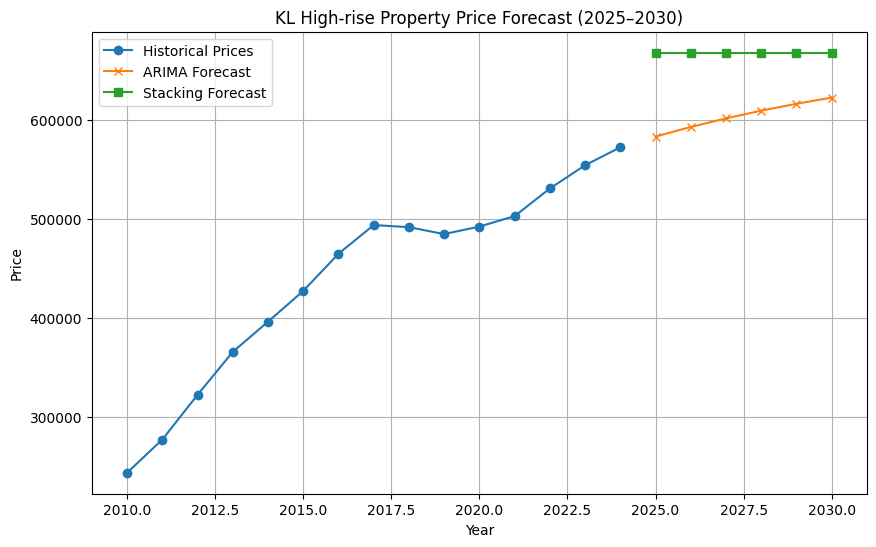

ARIMA Forecast (2025–2030): [583491.82847157 593212.65287358 601915.52534565 609707.04447332
 616682.64597866 622927.77168059]
Stacking Forecast (2025–2030): [668354.13143501 668354.13143501 668354.13143501 668354.13143501
 668354.13143501 668354.13143501]


In [ ]:
# Hybrid ARIMA + Stacking Model Forecast for KL High-rise Prices (2025–2030)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# STEP 1: Load MHPI_Annual.csv for ARIMA
# -----------------------------
mhpi_df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv")  # Ensure this file is in your working directory
price_series = mhpi_df['Price']

# Fit ARIMA model and forecast 2025–2030
arima_model = ARIMA(price_series, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=6)
forecast_years = list(range(2025, 2031))

# -----------------------------
# STEP 2: Load KLHighRise.csv for Stacking Model
# -----------------------------
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv")  # Ensure this file is available locally

# Preprocessing
df['ParcelArea'] = df['ParcelArea'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(np.float32)
df['Tenure'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0}).fillna(0).astype(np.float32)

# Outlier capping
price_cap = df['TransactionPrice'].quantile(0.90)
df['TransactionPrice'] = np.clip(df['TransactionPrice'], 0, price_cap).astype(np.float32)
area_cap = df['ParcelArea'].quantile(0.90)
df['ParcelArea'] = np.clip(df['ParcelArea'], 0, area_cap).astype(np.float32)

# Log-transform
df['TransactionPrice'] = np.log1p(df['TransactionPrice']).astype(np.float32)
df['ParcelArea'] = np.log1p(df['ParcelArea']).astype(np.float32)

# Target encode SchemeName
scheme_encoding = df.groupby('SchemeName')['TransactionPrice'].mean().astype(np.float32)
df['Scheme_Name_encoded'] = df['SchemeName'].map(scheme_encoding).fillna(scheme_encoding.mean()).astype(np.float32)

# One-hot encode Mukim
df = pd.get_dummies(df, columns=['Mukim'], drop_first=True, dtype=np.float32)

# Clean UnitLevel
unit_level_map = {'03A': 4, '12B': 12, '13A': 14, '23A': 24, '33A': 34, '43A': 44, '53A': 54,
                  'B': 0, 'D': 0, 'G': 0, 'LG': 0, 'MZ': 0, 'P': 0, 'UG': 0}
df['UnitLevel_clean'] = df['UnitLevel'].replace(unit_level_map)
unit_level_mean = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').mean()
df['UnitLevel_clean'] = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').fillna(unit_level_mean).astype(np.float32)

# Selected features
selected_features = ['Scheme_Name_encoded', 'ParcelArea', 'Mukim_Mukim Batu', 'UnitLevel_clean', 'Tenure']
X = df[selected_features]
y = df['TransactionPrice']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# STEP 3: Build Stacking Model
# -----------------------------
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)
stacking_model.fit(X_train, y_train)

# -----------------------------
# STEP 4: Hybrid Forecast
# -----------------------------
future_data = pd.DataFrame({
    'Scheme_Name_encoded': [X['Scheme_Name_encoded'].mean()] * 6,
    'ParcelArea': [X['ParcelArea'].mean()] * 6,
    'Mukim_Mukim Batu': [X['Mukim_Mukim Batu'].mean()] * 6,
    'UnitLevel_clean': [X['UnitLevel_clean'].mean()] * 6,
    'Tenure': [X['Tenure'].mean()] * 6
})

stacking_forecast = stacking_model.predict(future_data)

# -----------------------------
# STEP 5: Plot Results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(mhpi_df['Year of Year'], mhpi_df['Price'], label='Historical Prices', marker='o')
plt.plot(forecast_years, arima_forecast, label='ARIMA Forecast', marker='x')
plt.plot(forecast_years, np.expm1(stacking_forecast), label='Stacking Forecast', marker='s')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('KL High-rise Property Price Forecast (2025–2030)')
plt.legend()
plt.grid(True)
plt.show()

# Print forecasted values
print("ARIMA Forecast (2025–2030):", arima_forecast.values)
print("Stacking Forecast (2025–2030):", np.expm1(stacking_forecast))

# Dynamic Index Point + ARIMA Predictions as Features - Option A (retrain with ARIMA features)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 11513, number of used features: 5
[LightGBM] [Info] Start training from score 13.333459
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 9210, number of used features: 5
[LightGBM] [Info] Start training from score 13.334137
[LightGBM] [Warning] Found whit

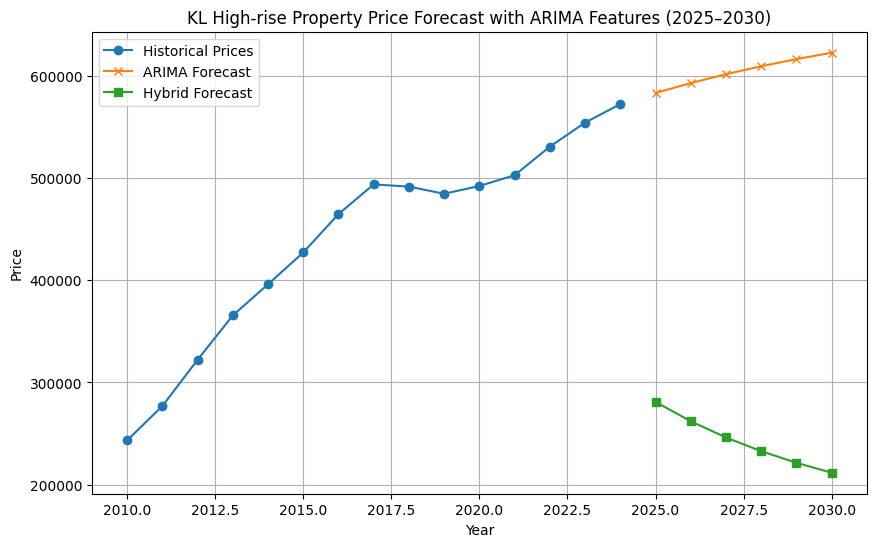

ARIMA Forecast (2025–2030): [583491.82847157 593212.65287358 601915.52534565 609707.04447332
 616682.64597866 622927.77168059]
Hybrid Forecast (2025–2030): [280978.49127848 262009.57989624 246116.13747934 232706.73572994
 221322.58721404 211603.88107817]


In [ ]:
# Hybrid Forecast with ARIMA Features (Price + Index Point)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# -----------------------------
# STEP 1: Load MHPI_Annual.csv for ARIMA
# -----------------------------
mhpi_df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv")  # Ensure file is in working directory
price_series = mhpi_df['Price']
index_series = mhpi_df['Index Point']

# Fit ARIMA models for historical predictions
arima_price = ARIMA(price_series, order=(1, 1, 1)).fit()
price_in_sample = arima_price.predict(start=1, end=len(price_series))

arima_index = ARIMA(index_series, order=(1, 1, 1)).fit()
index_in_sample = arima_index.predict(start=1, end=len(index_series))

# Forecast Price and Index Point for 2025–2030
price_forecast = arima_price.forecast(steps=6)
index_forecast = arima_index.forecast(steps=6)
forecast_years = list(range(2025, 2031))

# -----------------------------
# STEP 2: Load KLHighRise.csv for Stacking Model
# -----------------------------
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv")  # Ensure file is available locally

# Preprocessing
df['ParcelArea'] = df['ParcelArea'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(np.float32)
df['Tenure'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0}).fillna(0).astype(np.float32)

# Outlier capping
price_cap = df['TransactionPrice'].quantile(0.90)
df['TransactionPrice'] = np.clip(df['TransactionPrice'], 0, price_cap).astype(np.float32)
area_cap = df['ParcelArea'].quantile(0.90)
df['ParcelArea'] = np.clip(df['ParcelArea'], 0, area_cap).astype(np.float32)

# Log-transform
df['TransactionPrice'] = np.log1p(df['TransactionPrice']).astype(np.float32)
df['ParcelArea'] = np.log1p(df['ParcelArea']).astype(np.float32)

# Target encode SchemeName
scheme_encoding = df.groupby('SchemeName')['TransactionPrice'].mean().astype(np.float32)
df['Scheme_Name_encoded'] = df['SchemeName'].map(scheme_encoding).fillna(scheme_encoding.mean()).astype(np.float32)

# One-hot encode Mukim
df = pd.get_dummies(df, columns=['Mukim'], drop_first=True, dtype=np.float32)

# Clean UnitLevel
unit_level_map = {'03A': 4, '12B': 12, '13A': 14, '23A': 24, '33A': 34, '43A': 44, '53A': 54,
                  'B': 0, 'D': 0, 'G': 0, 'LG': 0, 'MZ': 0, 'P': 0, 'UG': 0}
df['UnitLevel_clean'] = df['UnitLevel'].replace(unit_level_map)
unit_level_mean = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').mean()
df['UnitLevel_clean'] = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').fillna(unit_level_mean).astype(np.float32)

# -----------------------------
# STEP 3: Add ARIMA in-sample predictions to training data
# -----------------------------
# Align ARIMA predictions with KLHighRise rows (use mean or merge logic)
df['ARIMA_Price'] = price_in_sample.mean()  # Simplified: same value for all rows
df['ARIMA_Index'] = index_in_sample.mean()  # Simplified: same value for all rows

# Selected features
selected_features = ['Scheme_Name_encoded', 'ParcelArea', 'Mukim_Mukim Batu', 'UnitLevel_clean', 'Tenure', 'ARIMA_Price', 'ARIMA_Index']
X = df[selected_features]
y = df['TransactionPrice']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# STEP 4: Build Stacking Model
# -----------------------------
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)
stacking_model.fit(X_train, y_train)

# -----------------------------
# STEP 5: Future Data with ARIMA Forecasts
# -----------------------------
future_data = pd.DataFrame({
    'Scheme_Name_encoded': [X['Scheme_Name_encoded'].mean()] * 6,
    'ParcelArea': [X['ParcelArea'].mean()] * 6,
    'Mukim_Mukim Batu': [X['Mukim_Mukim Batu'].mean()] * 6,
    'UnitLevel_clean': [X['UnitLevel_clean'].mean()] * 6,
    'Tenure': [X['Tenure'].mean()] * 6,
    'ARIMA_Price': price_forecast.values,
    'ARIMA_Index': index_forecast.values
})

hybrid_forecast = stacking_model.predict(future_data)

# -----------------------------
# STEP 6: Plot Results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(mhpi_df['Year of Year'], mhpi_df['Price'], label='Historical Prices', marker='o')
plt.plot(forecast_years, price_forecast, label='ARIMA Forecast', marker='x')
plt.plot(forecast_years, np.expm1(hybrid_forecast), label='Hybrid Forecast', marker='s')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('KL High-rise Property Price Forecast with ARIMA Features (2025–2030)')
plt.legend()
plt.grid(True)
plt.show()

# Print forecasted values
print("ARIMA Forecast (2025–2030):", price_forecast.values)
print("Hybrid Forecast (2025–2030):", np.expm1(hybrid_forecast))

# Dynamic Index Point + ARIMA Predictions as Features - Option B: Use passthrough stacking and keep ARIMA features separate

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 11513, number of used features: 5
[LightGBM] [Info] Start training from score 13.333459
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 9210, number of used features: 5
[LightGBM] [Info] Start training from score 13.334137
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Inf

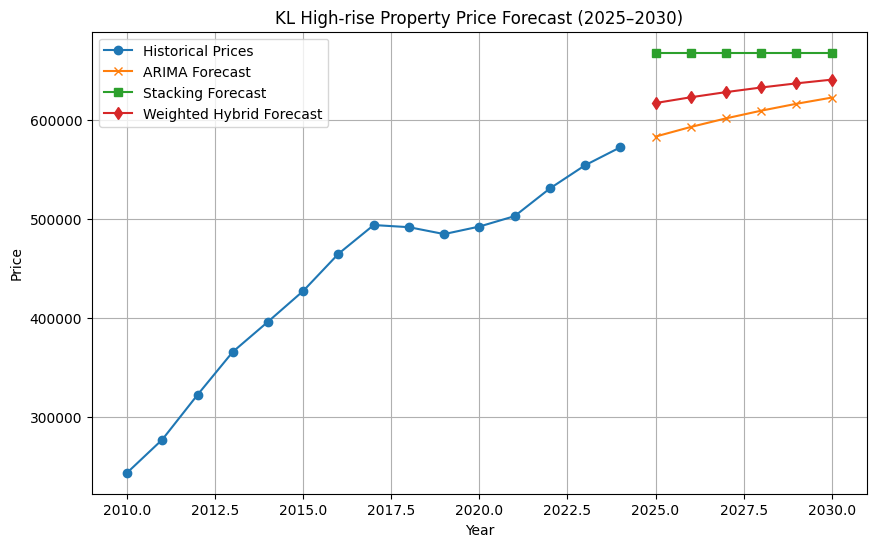

ARIMA Forecast (2025–2030): [583491.82847157 593212.65287358 601915.52534565 609707.04447332
 616682.64597866 622927.77168059]
Stacking Forecast (2025–2030): [668354.13143501 668354.13143501 668354.13143501 668354.13143501
 668354.13143501 668354.13143501]


In [ ]:
# Option B: Passthrough Stacking + ARIMA (Separate)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# -----------------------------
# STEP 1: Load MHPI_Annual.csv for ARIMA
# -----------------------------
mhpi_df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv")
price_series = mhpi_df['Price']

# Fit ARIMA and forecast 2025–2030
arima_model = ARIMA(price_series, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=6)
forecast_years = list(range(2025, 2031))

# -----------------------------
# STEP 2: Load KLHighRise.csv for Stacking Model
# -----------------------------
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv")

# Preprocessing
df['ParcelArea'] = df['ParcelArea'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(np.float32)
df['Tenure'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0}).fillna(0).astype(np.float32)

# Outlier capping
price_cap = df['TransactionPrice'].quantile(0.90)
df['TransactionPrice'] = np.clip(df['TransactionPrice'], 0, price_cap).astype(np.float32)
area_cap = df['ParcelArea'].quantile(0.90)
df['ParcelArea'] = np.clip(df['ParcelArea'], 0, area_cap).astype(np.float32)

# Log-transform
df['TransactionPrice'] = np.log1p(df['TransactionPrice']).astype(np.float32)
df['ParcelArea'] = np.log1p(df['ParcelArea']).astype(np.float32)

# Target encode SchemeName
scheme_encoding = df.groupby('SchemeName')['TransactionPrice'].mean().astype(np.float32)
df['Scheme_Name_encoded'] = df['SchemeName'].map(scheme_encoding).fillna(scheme_encoding.mean()).astype(np.float32)

# One-hot encode Mukim
df = pd.get_dummies(df, columns=['Mukim'], drop_first=True, dtype=np.float32)

# Clean UnitLevel
unit_level_map = {'03A': 4, '12B': 12, '13A': 14, '23A': 24, '33A': 34, '43A': 44, '53A': 54,
                  'B': 0, 'D': 0, 'G': 0, 'LG': 0, 'MZ': 0, 'P': 0, 'UG': 0}
df['UnitLevel_clean'] = df['UnitLevel'].replace(unit_level_map)
unit_level_mean = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').mean()
df['UnitLevel_clean'] = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').fillna(unit_level_mean).astype(np.float32)

# Selected features
selected_features = ['Scheme_Name_encoded', 'ParcelArea', 'Mukim_Mukim Batu', 'UnitLevel_clean', 'Tenure']
X = df[selected_features]
y = df['TransactionPrice']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# STEP 3: Build Stacking Model
# -----------------------------
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)
stacking_model.fit(X_train, y_train)

# -----------------------------
# STEP 4: Future Data for Stacking Prediction
# -----------------------------
future_data = pd.DataFrame({
    'Scheme_Name_encoded': [X['Scheme_Name_encoded'].mean()] * 6,
    'ParcelArea': [X['ParcelArea'].mean()] * 6,
    'Mukim_Mukim Batu': [X['Mukim_Mukim Batu'].mean()] * 6,
    'UnitLevel_clean': [X['UnitLevel_clean'].mean()] * 6,
    'Tenure': [X['Tenure'].mean()] * 6
})

stacking_forecast = stacking_model.predict(future_data)

# -----------------------------
# STEP 5: Weighted Hybrid Forecast
# -----------------------------
weight_arima = 0.6
weight_stack = 0.4
hybrid_forecast = (weight_arima * arima_forecast) + (weight_stack * np.expm1(stacking_forecast))

# -----------------------------
# STEP 6: Plot Results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(mhpi_df['Year of Year'], mhpi_df['Price'], label='Historical Prices', marker='o')
plt.plot(forecast_years, arima_forecast, label='ARIMA Forecast', marker='x')
plt.plot(forecast_years, np.expm1(stacking_forecast), label='Stacking Forecast', marker='s')
plt.plot(forecast_years, hybrid_forecast, label='Weighted Hybrid Forecast', marker='d')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('KL High-rise Property Price Forecast (2025–2030)')
plt.legend()
plt.grid(True)
plt.show()

# Print forecasted values
print("ARIMA Forecast (2025–2030):", arima_forecast.values)
print("Stacking Forecast (2025–2030):", np.expm1(stacking_forecast))


# Option B: Weighted Hybrid Forecast:

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 11513, number of used features: 5
[LightGBM] [Info] Start training from score 13.333459
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 9210, number of used features: 5
[LightGBM] [Info] Start training from score 13.334137
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Inf

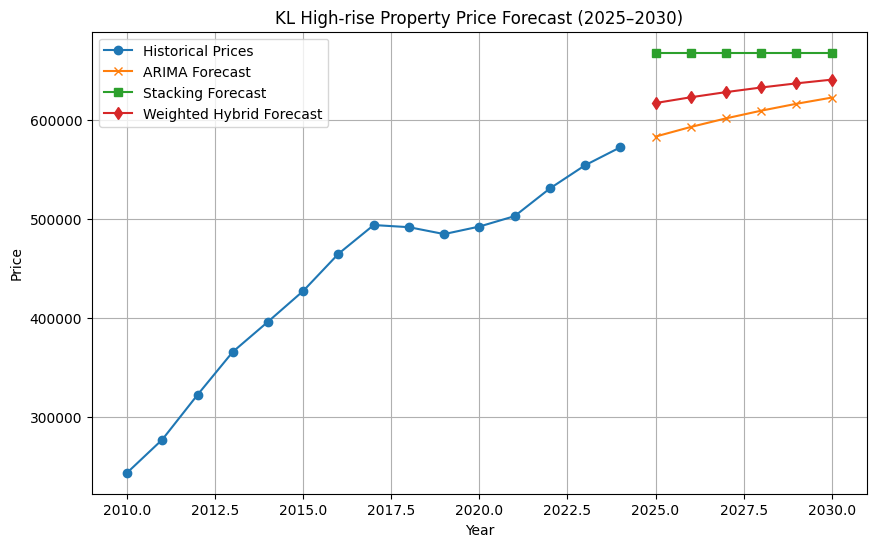

ARIMA Forecast (2025–2030): [583491.82847157 593212.65287358 601915.52534565 609707.04447332
 616682.64597866 622927.77168059]
Stacking Forecast (2025–2030): [668354.13143501 668354.13143501 668354.13143501 668354.13143501
 668354.13143501 668354.13143501]
Weighted Hybrid Forecast (2025–2030): 15    617436.749657
16    623269.244298
17    628490.967781
18    633165.879258
19    637351.240161
20    641098.315582
Name: predicted_mean, dtype: float64


In [ ]:
# Weighted Hybrid Forecast: ARIMA + Stacking
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# -----------------------------
# STEP 1: Load MHPI_Annual.csv for ARIMA
# -----------------------------
mhpi_df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv")
price_series = mhpi_df['Price']

# Fit ARIMA and forecast 2025–2030
arima_model = ARIMA(price_series, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=6)
forecast_years = list(range(2025, 2031))

# -----------------------------
# STEP 2: Load KLHighRise.csv for Stacking Model
# -----------------------------
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv")

# Preprocessing
df['ParcelArea'] = df['ParcelArea'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(np.float32)
df['Tenure'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0}).fillna(0).astype(np.float32)

# Outlier capping
price_cap = df['TransactionPrice'].quantile(0.90)
df['TransactionPrice'] = np.clip(df['TransactionPrice'], 0, price_cap).astype(np.float32)
area_cap = df['ParcelArea'].quantile(0.90)
df['ParcelArea'] = np.clip(df['ParcelArea'], 0, area_cap).astype(np.float32)

# Log-transform
df['TransactionPrice'] = np.log1p(df['TransactionPrice']).astype(np.float32)
df['ParcelArea'] = np.log1p(df['ParcelArea']).astype(np.float32)

# Target encode SchemeName
scheme_encoding = df.groupby('SchemeName')['TransactionPrice'].mean().astype(np.float32)
df['Scheme_Name_encoded'] = df['SchemeName'].map(scheme_encoding).fillna(scheme_encoding.mean()).astype(np.float32)

# One-hot encode Mukim
df = pd.get_dummies(df, columns=['Mukim'], drop_first=True, dtype=np.float32)

# Clean UnitLevel
unit_level_map = {'03A': 4, '12B': 12, '13A': 14, '23A': 24, '33A': 34, '43A': 44, '53A': 54,
                  'B': 0, 'D': 0, 'G': 0, 'LG': 0, 'MZ': 0, 'P': 0, 'UG': 0}
df['UnitLevel_clean'] = df['UnitLevel'].replace(unit_level_map)
unit_level_mean = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').mean()
df['UnitLevel_clean'] = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').fillna(unit_level_mean).astype(np.float32)

# Selected features
selected_features = ['Scheme_Name_encoded', 'ParcelArea', 'Mukim_Mukim Batu', 'UnitLevel_clean', 'Tenure']
X = df[selected_features]
y = df['TransactionPrice']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# STEP 3: Build Stacking Model
# -----------------------------
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)
stacking_model.fit(X_train, y_train)

# -----------------------------
# STEP 4: Future Data for Stacking Prediction
# -----------------------------
future_data = pd.DataFrame({
    'Scheme_Name_encoded': [X['Scheme_Name_encoded'].mean()] * 6,
    'ParcelArea': [X['ParcelArea'].mean()] * 6,
    'Mukim_Mukim Batu': [X['Mukim_Mukim Batu'].mean()] * 6,
    'UnitLevel_clean': [X['UnitLevel_clean'].mean()] * 6,
    'Tenure': [X['Tenure'].mean()] * 6
})

stacking_forecast = stacking_model.predict(future_data)

# -----------------------------
# STEP 5: Weighted Hybrid Forecast
# -----------------------------
weight_arima = 0.6
weight_stack = 0.4
hybrid_forecast = (weight_arima * arima_forecast) + (weight_stack * np.expm1(stacking_forecast))

# -----------------------------
# STEP 6: Plot Results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(mhpi_df['Year of Year'], mhpi_df['Price'], label='Historical Prices', marker='o')
plt.plot(forecast_years, arima_forecast, label='ARIMA Forecast', marker='x')
plt.plot(forecast_years, np.expm1(stacking_forecast), label='Stacking Forecast', marker='s')
plt.plot(forecast_years, hybrid_forecast, label='Weighted Hybrid Forecast', marker='d')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('KL High-rise Property Price Forecast (2025–2030)')
plt.legend()
plt.grid(True)
plt.show()

# Print forecasted values
print("ARIMA Forecast (2025–2030):", arima_forecast.values)
print("Stacking Forecast (2025–2030):", np.expm1(stacking_forecast))
print("Weighted Hybrid Forecast (2025–2030):", hybrid_forecast)


# dynamic weights based on RMSE

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 11513, number of used features: 5
[LightGBM] [Info] Start training from score 13.333459
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 9210, number of used features: 5
[LightGBM] [Info] Start training from score 13.334137
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Inf

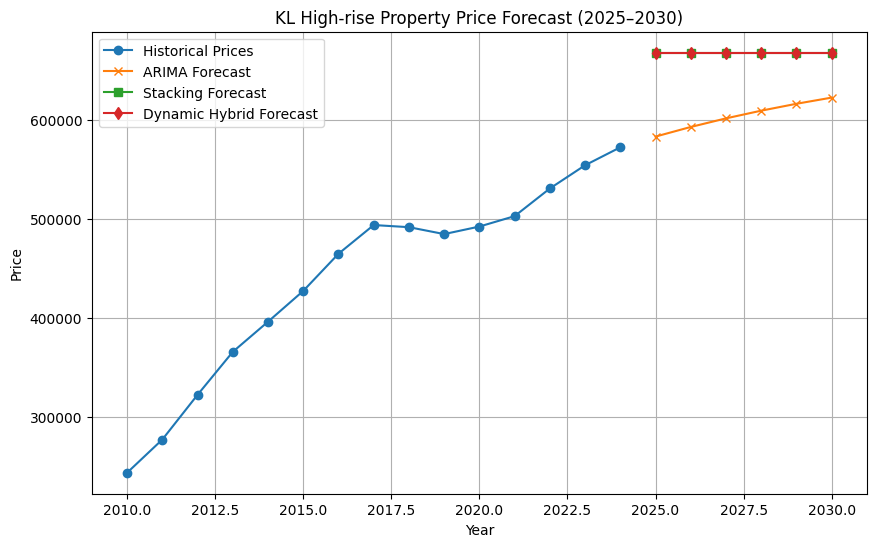

ARIMA Forecast: [583491.82847157 593212.65287358 601915.52534565 609707.04447332
 616682.64597866 622927.77168059]
Stacking Forecast: [668354.13143501 668354.13143501 668354.13143501 668354.13143501
 668354.13143501 668354.13143501]
Dynamic Hybrid Forecast: 15    668353.320649
16    668353.413523
17    668353.496671
18    668353.571113
19    668353.637759
20    668353.697425
Name: predicted_mean, dtype: float64


In [ ]:
# Dynamic Weighted Hybrid Forecast: ARIMA + Stacking
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# -----------------------------
# STEP 1: Load MHPI_Annual.csv for ARIMA
# -----------------------------
mhpi_df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv")
price_series = mhpi_df['Price']

# Fit ARIMA and get in-sample predictions
arima_model = ARIMA(price_series, order=(1, 1, 1)).fit()
arima_in_sample = arima_model.predict(start=1, end=len(price_series)-1)
arima_rmse = np.sqrt(mean_squared_error(price_series[1:], arima_in_sample))

# Forecast 2025–2030
arima_forecast = arima_model.forecast(steps=6)
forecast_years = list(range(2025, 2031))

# -----------------------------
# STEP 2: Load KLHighRise.csv for Stacking Model
# -----------------------------
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv")

# Preprocessing
df['ParcelArea'] = df['ParcelArea'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(np.float32)
df['Tenure'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0}).fillna(0).astype(np.float32)

# Outlier capping
price_cap = df['TransactionPrice'].quantile(0.90)
df['TransactionPrice'] = np.clip(df['TransactionPrice'], 0, price_cap).astype(np.float32)
area_cap = df['ParcelArea'].quantile(0.90)
df['ParcelArea'] = np.clip(df['ParcelArea'], 0, area_cap).astype(np.float32)

# Log-transform
df['TransactionPrice'] = np.log1p(df['TransactionPrice']).astype(np.float32)
df['ParcelArea'] = np.log1p(df['ParcelArea']).astype(np.float32)

# Target encode SchemeName
scheme_encoding = df.groupby('SchemeName')['TransactionPrice'].mean().astype(np.float32)
df['Scheme_Name_encoded'] = df['SchemeName'].map(scheme_encoding).fillna(scheme_encoding.mean()).astype(np.float32)

# One-hot encode Mukim
df = pd.get_dummies(df, columns=['Mukim'], drop_first=True, dtype=np.float32)

# Clean UnitLevel
unit_level_map = {'03A': 4, '12B': 12, '13A': 14, '23A': 24, '33A': 34, '43A': 44, '53A': 54,
                  'B': 0, 'D': 0, 'G': 0, 'LG': 0, 'MZ': 0, 'P': 0, 'UG': 0}
df['UnitLevel_clean'] = df['UnitLevel'].replace(unit_level_map)
unit_level_mean = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').mean()
df['UnitLevel_clean'] = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').fillna(unit_level_mean).astype(np.float32)

# Selected features
selected_features = ['Scheme_Name_encoded', 'ParcelArea', 'Mukim_Mukim Batu', 'UnitLevel_clean', 'Tenure']
X = df[selected_features]
y = df['TransactionPrice']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# STEP 3: Build Stacking Model
# -----------------------------
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)
stacking_model.fit(X_train, y_train)

# Stacking RMSE
y_pred_stack = stacking_model.predict(X_test)
stacking_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))

# -----------------------------
# STEP 4: Compute Dynamic Weights
# -----------------------------
inv_arima = 1 / arima_rmse
inv_stack = 1 / stacking_rmse
weight_arima = inv_arima / (inv_arima + inv_stack)
weight_stack = 1 - weight_arima

print(f"ARIMA RMSE: {arima_rmse:.2f}, Stacking RMSE: {stacking_rmse:.2f}")
print(f"Dynamic Weights -> ARIMA: {weight_arima:.3f}, Stacking: {weight_stack:.3f}")

# -----------------------------
# STEP 5: Future Data for Stacking Prediction
# -----------------------------
future_data = pd.DataFrame({
    'Scheme_Name_encoded': [X['Scheme_Name_encoded'].mean()] * 6,
    'ParcelArea': [X['ParcelArea'].mean()] * 6,
    'Mukim_Mukim Batu': [X['Mukim_Mukim Batu'].mean()] * 6,
    'UnitLevel_clean': [X['UnitLevel_clean'].mean()] * 6,
    'Tenure': [X['Tenure'].mean()] * 6
})

stacking_forecast = stacking_model.predict(future_data)

# -----------------------------
# STEP 6: Hybrid Forecast
# -----------------------------
hybrid_forecast = (weight_arima * arima_forecast) + (weight_stack * np.expm1(stacking_forecast))

# -----------------------------
# STEP 7: Plot Results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(mhpi_df['Year of Year'], mhpi_df['Price'], label='Historical Prices', marker='o')
plt.plot(forecast_years, arima_forecast, label='ARIMA Forecast', marker='x')
plt.plot(forecast_years, np.expm1(stacking_forecast), label='Stacking Forecast', marker='s')
plt.plot(forecast_years, hybrid_forecast, label='Dynamic Hybrid Forecast', marker='d')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('KL High-rise Property Price Forecast (2025–2030)')
plt.legend()
plt.grid(True)
plt.show()

# Print forecasted values
print("ARIMA Forecast:", arima_forecast.values)
print("Stacking Forecast:", np.expm1(stacking_forecast))
print("Dynamic Hybrid Forecast:", hybrid_forecast)

# Simulate Realistic Feature Changes + Hybrid Forecast

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 11513, number of used features: 5
[LightGBM] [Info] Start training from score 13.333459
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 9210, number of used features: 5
[LightGBM] [Info] Start training from score 13.334137
[LightGBM] [Warning] Found whit

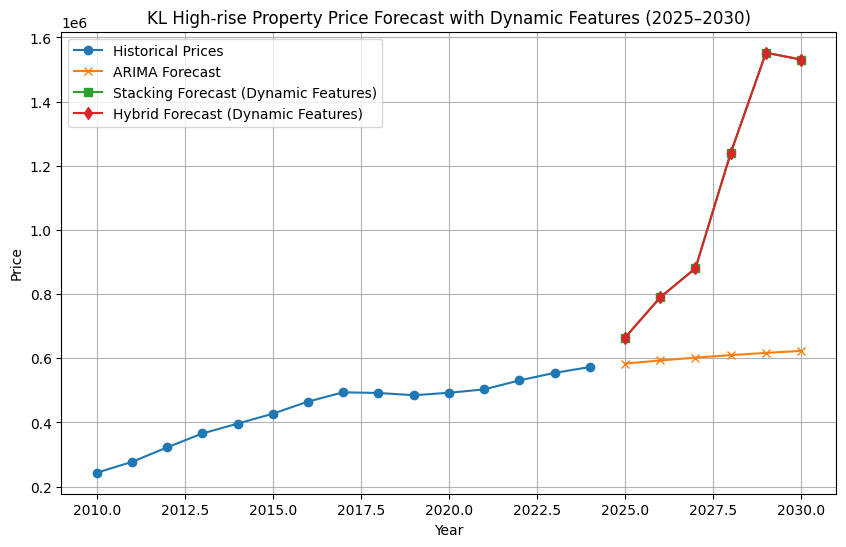

ARIMA Forecast: [583491.82847157 593212.65287358 601915.52534565 609707.04447332
 616682.64597866 622927.77168059]
Stacking Forecast (Dynamic): [ 664392.84058506  789803.31645846  880652.25150188 1239702.30587425
 1552241.3306348  1530894.53361147]
Hybrid Forecast (Dynamic): 15    6.643921e+05
16    7.898014e+05
17    8.806496e+05
18    1.239696e+06
19    1.552232e+06
20    1.530886e+06
Name: predicted_mean, dtype: float64


In [ ]:
# Simulate Dynamic Features for Stacking Forecast + Hybrid Combination
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# -----------------------------
# STEP 1: Load MHPI_Annual.csv for ARIMA
# -----------------------------
mhpi_df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/MHPI_Annual.csv")
price_series = mhpi_df['Price']

# Fit ARIMA and get in-sample predictions
arima_model = ARIMA(price_series, order=(1, 1, 1)).fit()
arima_in_sample = arima_model.predict(start=1, end=len(price_series)-1)
arima_rmse = np.sqrt(mean_squared_error(price_series[1:], arima_in_sample))

# Forecast 2025–2030
arima_forecast = arima_model.forecast(steps=6)
forecast_years = list(range(2025, 2031))

# -----------------------------
# STEP 2: Load KLHighRise.csv for Stacking Model
# -----------------------------
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv")

# Preprocessing
df['ParcelArea'] = df['ParcelArea'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(np.float32)
df['Tenure'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0}).fillna(0).astype(np.float32)

# Outlier capping
price_cap = df['TransactionPrice'].quantile(0.90)
df['TransactionPrice'] = np.clip(df['TransactionPrice'], 0, price_cap).astype(np.float32)
area_cap = df['ParcelArea'].quantile(0.90)
df['ParcelArea'] = np.clip(df['ParcelArea'], 0, area_cap).astype(np.float32)

# Log-transform
df['TransactionPrice'] = np.log1p(df['TransactionPrice']).astype(np.float32)
df['ParcelArea'] = np.log1p(df['ParcelArea']).astype(np.float32)

# Target encode SchemeName
scheme_encoding = df.groupby('SchemeName')['TransactionPrice'].mean().astype(np.float32)
df['Scheme_Name_encoded'] = df['SchemeName'].map(scheme_encoding).fillna(scheme_encoding.mean()).astype(np.float32)

# One-hot encode Mukim
df = pd.get_dummies(df, columns=['Mukim'], drop_first=True, dtype=np.float32)

# Clean UnitLevel
unit_level_map = {'03A': 4, '12B': 12, '13A': 14, '23A': 24, '33A': 34, '43A': 44, '53A': 54,
                  'B': 0, 'D': 0, 'G': 0, 'LG': 0, 'MZ': 0, 'P': 0, 'UG': 0}
df['UnitLevel_clean'] = df['UnitLevel'].replace(unit_level_map)
unit_level_mean = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').mean()
df['UnitLevel_clean'] = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').fillna(unit_level_mean).astype(np.float32)

# Selected features
selected_features = ['Scheme_Name_encoded', 'ParcelArea', 'Mukim_Mukim Batu', 'UnitLevel_clean', 'Tenure']
X = df[selected_features]
y = df['TransactionPrice']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# STEP 3: Build Stacking Model
# -----------------------------
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)
stacking_model.fit(X_train, y_train)

# Stacking RMSE
y_pred_stack = stacking_model.predict(X_test)
stacking_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))

# -----------------------------
# STEP 4: Compute Dynamic Weights
# -----------------------------
inv_arima = 1 / arima_rmse
inv_stack = 1 / stacking_rmse
weight_arima = inv_arima / (inv_arima + inv_stack)
weight_stack = 1 - weight_arima

print(f"ARIMA RMSE: {arima_rmse:.2f}, Stacking RMSE: {stacking_rmse:.2f}")
print(f"Dynamic Weights -> ARIMA: {weight_arima:.3f}, Stacking: {weight_stack:.3f}")

# -----------------------------
# STEP 5: Simulate Dynamic Future Features
# -----------------------------
years_ahead = np.arange(6)
parcel_growth_rate = 0.01  # 1% per year
scheme_growth_rate = 0.02  # 2% per year

future_data = pd.DataFrame({
    'Scheme_Name_encoded': [X['Scheme_Name_encoded'].mean() * (1 + scheme_growth_rate * i) for i in years_ahead],
    'ParcelArea': [X['ParcelArea'].mean() * (1 + parcel_growth_rate * i) for i in years_ahead],
    'Mukim_Mukim Batu': [X['Mukim_Mukim Batu'].mean()] * 6,
    'UnitLevel_clean': [X['UnitLevel_clean'].mean() + np.random.randint(-1, 2) for _ in years_ahead],
    'Tenure': [X['Tenure'].mean()] * 6
})

stacking_forecast_dynamic = stacking_model.predict(future_data)

# -----------------------------
# STEP 6: Hybrid Forecast
# -----------------------------
hybrid_forecast_dynamic = (weight_arima * arima_forecast) + (weight_stack * np.expm1(stacking_forecast_dynamic))

# -----------------------------
# STEP 7: Plot Results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(mhpi_df['Year of Year'], mhpi_df['Price'], label='Historical Prices', marker='o')
plt.plot(forecast_years, arima_forecast, label='ARIMA Forecast', marker='x')
plt.plot(forecast_years, np.expm1(stacking_forecast_dynamic), label='Stacking Forecast (Dynamic Features)', marker='s')
plt.plot(forecast_years, hybrid_forecast_dynamic, label='Hybrid Forecast (Dynamic Features)', marker='d')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('KL High-rise Property Price Forecast with Dynamic Features (2025–2030)')
plt.legend()
plt.grid(True)
plt.show()

# Print forecasted values
print("ARIMA Forecast:", arima_forecast.values)
print("Stacking Forecast (Dynamic):", np.expm1(stacking_forecast_dynamic))
print("Hybrid Forecast (Dynamic):", hybrid_forecast_dynamic)